# EDA TripAdvisor dataset

In this notebook you can find the EDA for sprint 1.

We will first start with loading the dataset and the required libraries.

In [173]:
# Import pandas and read csv using pandas
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

original_df = pd.read_csv("./tripadvisor_dataset/restaurant_listings.csv")

# display the data and see how it formulated
pd.set_option("display.max_columns", None)
original_df.head(2)

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
0,#1,Kin Khao - Thai Eatery,5.0 of 5 bubbles,922 reviews,$$ - $$$|Thai|Healthy|Vegetarian Friendly,"Donkersteeg 21-23, Ghent 9000 Belgium",+32 468 10 59 59,http://www.kinkhao.be/,http://www.kinkhao.be/site/menu/,True,gent@kinkhao.be,True,False,5.0,5.0,4.5,-1.0,"Differing from formal dining establishments, K...",NaN,€10 - €28,"Thai, Healthy","Vegetarian Friendly, Vegan Options, Gluten Fre...","Dinner, Drinks","Reservations, Seating, Serves Alcohol, Free Wi...",13969825
1,#1,'t Sleutelgat,5.0 of 5 bubbles,200 reviews,$$$$|French|Belgian|European,"Kasseide 78, Ninove 9400 Belgium",+32 54 56 63 09,http://www.restaurant-sleutelgat.be/,NaN,True,restaurant_sleutelgat@telenet.be,False,True,5.0,5.0,4.5,5.0,NaN,NaN,€32 - €74,"French, Belgian, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Free Wifi, Reservations, Outdoor Seating, Seat...",740727


## Splitting the data

The first thing we'll do is split the data in a test set and a trainings set. This is to avoid data snooping when we finally want to use ML

In [174]:
from random import shuffle
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(original_df,test_size=0.2,train_size=0.8,shuffle=True)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 2084 to 191
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1887 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1898 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1890 non-null   object 
 7   website url          1735 non-null   object 
 8   menu url             714 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1095 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null  

## Clean the data

we will start with numeric data, labeling each attribute with the correct type

In [175]:
print(df_train.info())
df_train.head(2)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 2084 to 191
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1887 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1898 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1890 non-null   object 
 7   website url          1735 non-null   object 
 8   menu url             714 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1095 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null  

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
2084,#38,Frituur Obelix,4.0 of 5 bubbles,1 review,Belgian|European,"Markt 12, Geraardsbergen 9500 Belgium",+32 472 31 89 20,NaN,NaN,False,NaN,False,False,-1.0,-1.0,-1.0,-1.0,NaN,NaN,No pricing available,"Belgian, European",NaN,NaN,NaN,19071810
1653,#90,L'Art Nouveau,4.0 of 5 bubbles,8 reviews,$$ - $$$,"Molenstraat 2, Aalst 9300 Belgium",+32 479 36 09 84,NaN,NaN,False,NaN,False,False,-1.0,-1.0,-1.0,-1.0,NaN,NaN,No pricing available,NaN,NaN,NaN,Reservations,9781997


we will start by turning rank, general rating, number of reviews to numerical values

In [176]:

df_train["rank"]=df_train["rank"].str.replace("#","").astype(float)
df_train["general rating"]=df_train["general rating"].map(lambda x: x.split(" ")[0]).astype(float)
df_train["number of reviews"]=df_train["number of reviews"].map(lambda x: x.split(" ")[0].replace(",","")).astype(float)

we can start by looking at the distributions of these numerical features

In [177]:
numerical_cols=df_train.select_dtypes(include= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

In [178]:
#drop id because its not relevant for the plot
numerical_cols=numerical_cols.drop("id")
numerical_cols

Index(['rank', 'general rating', 'number of reviews', 'food rating',
       'service rating', 'value rating', 'atmosphere rating'],
      dtype='object')

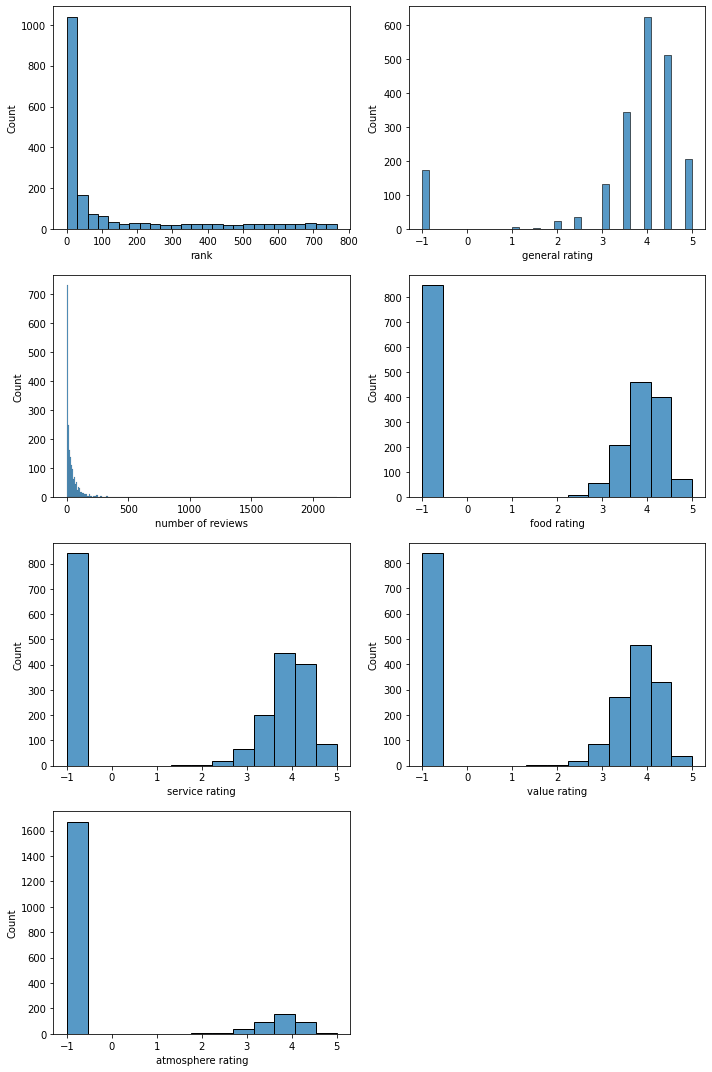

In [179]:
fig=plt.figure(figsize=(10,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,2,i+1)
    sns.histplot(df_train[col])
fig.tight_layout()
plt.show()

what we can see from these distributions is:
* most restaurants have a low rank (lower is better)
* ratings with value -1 mean that they are missing data, there is a lot of missing data visible


let's take a closer look at number of reviews

### number of reviews

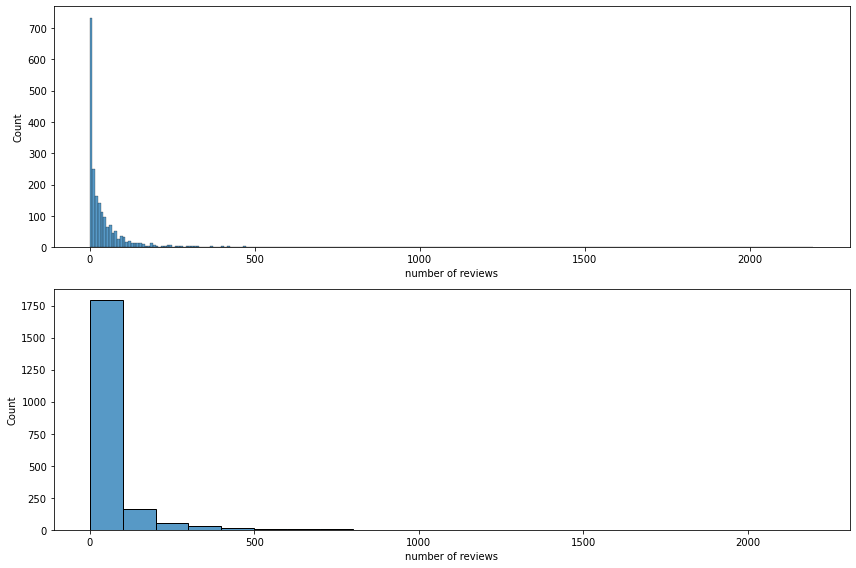

In [180]:
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.histplot(df_train["number of reviews"])
plt.subplot(2,1,2)
sns.histplot(df_train["number of reviews"],binwidth=100)
fig.tight_layout()
plt.show()


In [181]:
print(df_train["number of reviews"].value_counts())
zeros=df_train["number of reviews"].isna().sum()
print(f"number of missing values is {zeros}")

0.0      174
1.0      109
2.0      104
3.0       76
4.0       71
        ... 
317.0      1
499.0      1
187.0      1
277.0      1
273.0      1
Name: number of reviews, Length: 272, dtype: int64
number of missing values is 0


There are a lot of restaurants with 0 reviews and no missing values. how many exactly?

In [182]:
perc_no_review=df_train["number of reviews"].value_counts()[0]/len(df_train)
print(f"{perc_no_review*100:.2f}% of the restaurants have no reviews!")


8.43% of the restaurants have no reviews!


We decide a treshhold for restaurants with low reviews = 4. So restaurants with 3 or less reviews we consider "hidden treasures"

In [183]:
perc_hidden=df_train["number of reviews"].value_counts()[0:3].sum()/len(df_train)
print(f"percentage of hidden treasures: {perc_hidden*100:.2f}%")

percentage of hidden treasures: 22.43%


are they really hidden treasures?
* what are the ratings of these hidden treasures? maybe they don't have many reviews bacause people don't eat there because of a bad rating or maybe bcause of the location.
* is there a correlation between the location of a restaurant and the fact if its a hidden treasure or not? maybe there are clusters? maybe big cities don't have these "hidden treasures"

we will come back to this later, first we can start by extracting the city

In [184]:
df_train['city'] = df_train["address"].str.split(', ').str[-1].str.split(" ").str[0]

we can also use some external libraries to extract latitute and longitude from the full address (so its easier to plot)

In [185]:
df_train["address"]

2084                Markt 12, Geraardsbergen 9500 Belgium
1653                    Molenstraat 2, Aalst 9300 Belgium
186                      Hoogpoort 28, Ghent 9000 Belgium
1892    Ketterijstraat 22 Watervliet, Sint-Laureins 99...
1336              Mullemstraat 1, Oudenaarde 9700 Belgium
                              ...                        
2188            Grote Markt 26, Sint-Niklaas 9100 Belgium
2247                Walpoortstraat 26, Ghent 9000 Belgium
1955                  Bellemstraat 1, Aalter 9880 Belgium
633     Vaartstraat 2 9852, Hansbeke, Nevele 9850 Belgium
191                   Karperstraat 16, Zulte 9870 Belgium
Name: address, Length: 2064, dtype: object

In the next code block we try to find a correlation between the popularity of a restaurant and the type of restaurant. For example are Chinese restaurants the most popular? We find this out by using the average rank as popularity measure and the tags as restaurant type.

In [186]:
df_train_tags_cleaned = df_train.copy()

# splitting all the tags
df_train_tags_cleaned["tags"] = df_train_tags_cleaned["tags"].str.split("|")

# converting every tag into a new column
df_train_tags_cleaned = df_train_tags_cleaned.explode('tags').reset_index(drop=True)

# drop all tags with $ in
df_train_tags_cleaned = df_train_tags_cleaned.groupby("tags").filter(lambda x : str(x).count("$") == 0)

# make a copy for in a later stage
df_train_tags_cleaned_copy = df_train_tags_cleaned.copy()

# keep the rank and tags column
df_train_tags_cleaned = df_train_tags_cleaned[["rank", "tags"]]



# group by tag and take the mean of all the ranks
df_train_tags_cleaned = df_train_tags_cleaned.groupby("tags").mean()
df_train_tags_cleaned = df_train_tags_cleaned.dropna()
df_train_tags_cleaned = df_train_tags_cleaned.sort_values(by=["rank"]) # sorting
df_train_tags_cleaned


,rank
tags,
Cajun & Creole,3.000000
Japanese sweets parlour,6.000000
Central European,6.800000
Beijing Specialties,9.000000
German,9.666667
...,...
Central American,406.000000
Pakistani,456.000000
Halal,527.000000


From the column above we can see that the tag Cajun & Creole is the most popular. It might be interesting to start a restaurant with one of the top ranked types to be popular.

If you know what type restaurant you want to open, a very important decision is to choose where to open your restaurant.
We want to know the following questions:

* Which city is has the highest average ranked restaurants?
* How many type restaurants are there in every city? (for example how many chinese restaurants in Gent, Antwerpen, ...)

The answer on the following questions can give us insight on the location of the restaurant.

In [187]:
df_train_city = df_train[["city", "rank"]]

count = df_train_city.groupby("city").count()

df_train_city = df_train_city.dropna()
df_train_city = df_train_city.groupby("city").mean()
df_train_city["amount of restaurants"] = count
df_train_city = df_train_city.sort_values(by=["amount of restaurants", "rank"], ascending=[False, True])


df_train_city.head(50)


,rank,amount of restaurants
city,,
Ghent,385.009554,628
Aalst,65.384615,104
Sint-Niklaas,55.935484,93
Dendermonde,32.311111,45
Ninove,24.536585,41
Ronse,23.692308,39
Lokeren,22.888889,36
Oudenaarde,29.277778,36
Geraardsbergen,20.090909,33


With the code above we answer the first question altough it's not sorted on the average rank. The reason why is because you would see as first the cities with one restaurant and a high ranking. This doesn't tell us much, this is why we sort first on the amount of restaurants in a city.

In [232]:
df_train_city_type = df_train_tags_cleaned_copy[["city", "tags"]]
df_train_city_type = df_train_city_type.groupby(["tags", "city"])["city"].count().to_frame()
df_train_city_type = df_train_city_type.rename(columns={"city": "city_count"})







ideas:
* zoek correlatie tussen rank en een van de rating features
* mss tussen de rating features onderling? dat ze zelfde waarde aangeven en dus overbodig zijn?
* kijk of er clustering is van restaurant prijs en locatie of restaurant prijs en type restaurant. vb er zijn veel meer japanse restaurants in de dure categorie dan japanse restaurants in de goedkope ...
* zie github voor meer